In [14]:
import json
import google.generativeai as genai
import regex as re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
genai.configure(api_key="YOUR_API_KEY")

In [17]:
def get_sentiment(text):
    """
    Analyzes the sentiment of a given text using Google Gemini and returns the sentiment.

    Args:
        text: The input text to analyze.

    Returns:
        The sentiment of the text as a string ("positive", "neutral", "negative", "frustrated").
    """

    model = genai.GenerativeModel("gemini-1.5-flash")
    prompt = f"""for every input sentence respond with sentiment like this below (in json format)
    {{
    "thought": "<your thoughts on sentence and sentiment>",
    "sentiment": "<neutral, positive, negative, frustated>"
    }}

    "input": "{text}" """

    response = model.generate_content(prompt)
    output = response.text

    def remove_json_tags(text):
        cleaned_text = re.sub(r'^```json\s*|\s*```$', '', text, flags=re.DOTALL)
        return cleaned_text.strip()

    output = remove_json_tags(output)
    data = json.loads(output)
    return data

# Example usage:
text = "This is a great product!"
resp = get_sentiment(text)
print(resp['thought'])
print(resp['sentiment'])

The sentence expresses strong positive feeling towards a product.  The use of 'great' is a clear indicator of positive sentiment.
positive


In [ ]:
df = pd.read_csv('e-Commerce_Customer_Support_Conversations.csv')
df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [ ]:
res = df.iloc[:10, 3].apply(lambda x : get_sentiment(x))
for i in range(len(res)):
  print(res[i]['sentiment'])

neutral
neutral
negative
negative
negative
neutral
neutral
neutral
neutral
frustrated


In [ ]:
df['customer_sentiment'].value_counts()

,count
customer_sentiment,
neutral,552
negative,316
frustrated,105
positive,27


In [ ]:
df.iloc[:10, 4]

,customer_sentiment
0,neutral
1,neutral
2,neutral
3,neutral
4,negative
5,negative
6,frustrated
7,neutral
8,negative
9,negative


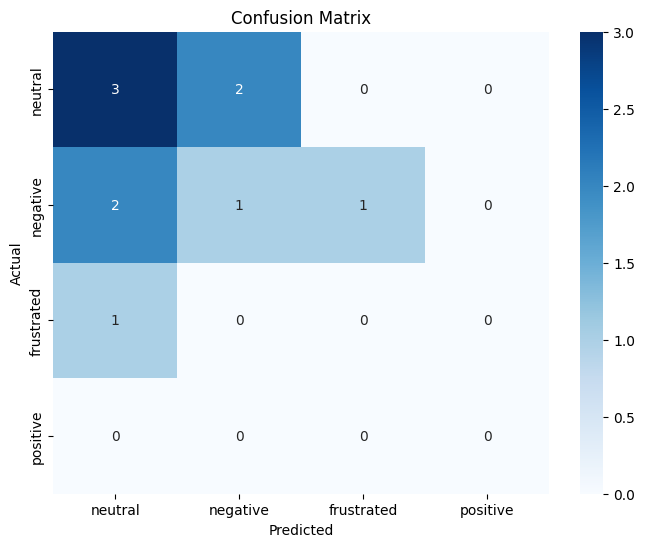

In [ ]:
from sklearn.metrics import confusion_matrix
# Extract the first 10 values from both series
y_true = df['customer_sentiment'].iloc[:10]
y_pred = res.apply(lambda x: x['sentiment'])

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['neutral', 'negative', 'frustrated', 'positive'])

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['neutral', 'negative', 'frustrated', 'positive'],
            yticklabels=['neutral', 'negative', 'frustrated', 'positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()